<h1>Data Mining
<h3>W07 - Class Assignment

Tiffany Christabel Anggriawan - 0706022310041

### Part A: Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv'
df = pd.read_csv(url)

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data information and summary statistics

In [5]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Data quality checks

In [8]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [9]:
print("Data Types:")
print(df.dtypes)

Data Types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [10]:
if 'Gender' in df.columns:
    print("Unique Gender values:", df['Gender'].unique())
    print("Gender distribution:")
    print(df['Gender'].value_counts())

Unique Gender values: ['Male' 'Female']
Gender distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


Distribution of numerical features

In [11]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


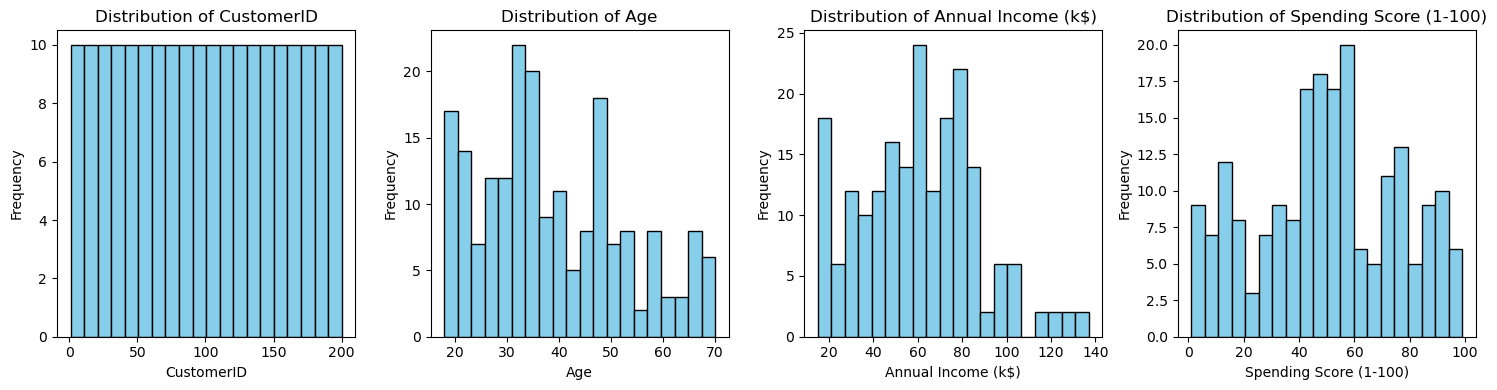

In [12]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))
if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Box plots to detect outliers

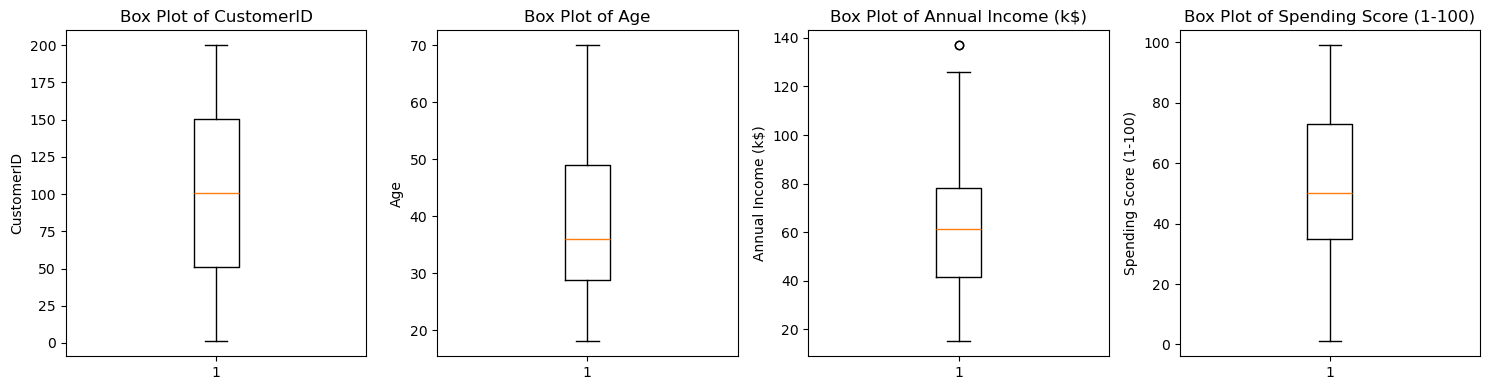

In [13]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))
if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

Correlation analysis

In [14]:
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


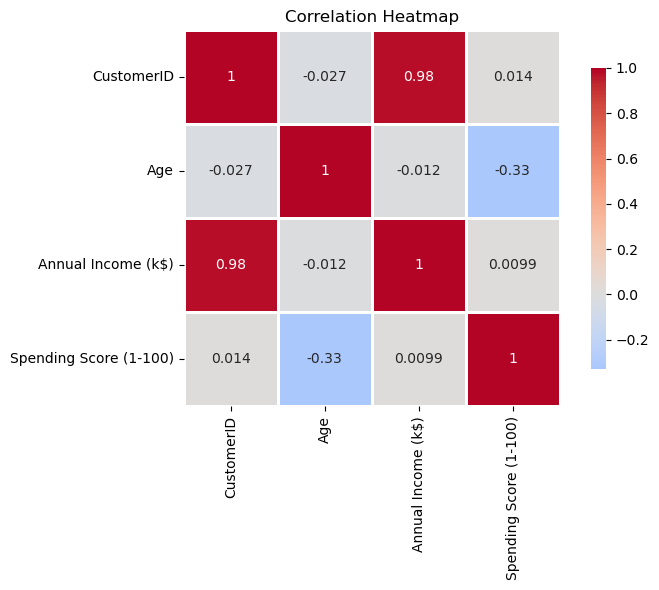

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Scatter plots for relationship analysis

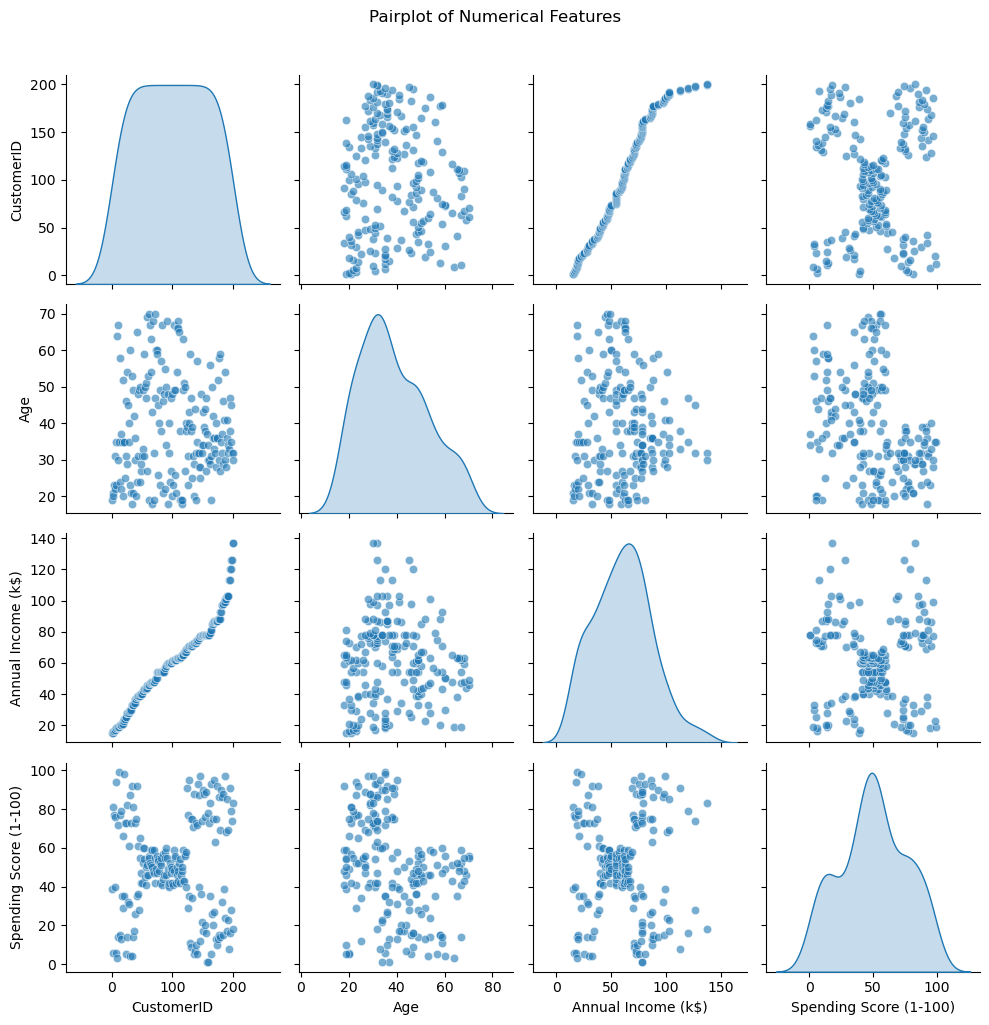

In [16]:
if len(numerical_cols) > 1:
    sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Only one numerical column available, skipping pairplot.")

### Part B: Data Transformation

Feature selection for clustering

In [17]:
clustering_features = [col for col in numerical_cols if 'ID' not in col.upper() and 'CUSTOMER' not in col.upper()]
print("Features selected for clustering:", clustering_features)

Features selected for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [18]:
X = df[clustering_features].copy()
print("\nClustering data shape:", X.shape)
print("\nFirst few rows:")
print(X.head())


Clustering data shape: (200, 3)

First few rows:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


Standardization of features

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data statistics:")
print(X.describe())

Original data statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [22]:
X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features)

print("Scaled data statistics:")
print(X_scaled_df.describe())

Scaled data statistics:
                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.894492e+00


### Part C: Choosing K

Elbow method to determine optimal K

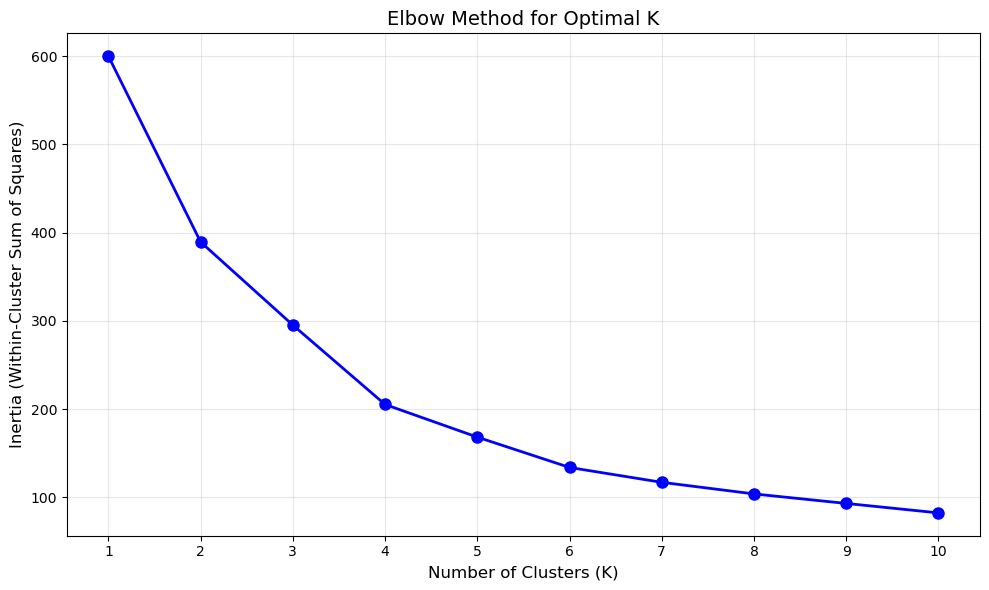

Inertia values for each K:
K=1: 600.00
K=2: 389.39
K=3: 295.21
K=4: 205.23
K=5: 168.25
K=6: 133.87
K=7: 117.01
K=8: 103.87
K=9: 93.09
K=10: 82.39


In [23]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Inertia values for each K:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

Silhouette score analysis

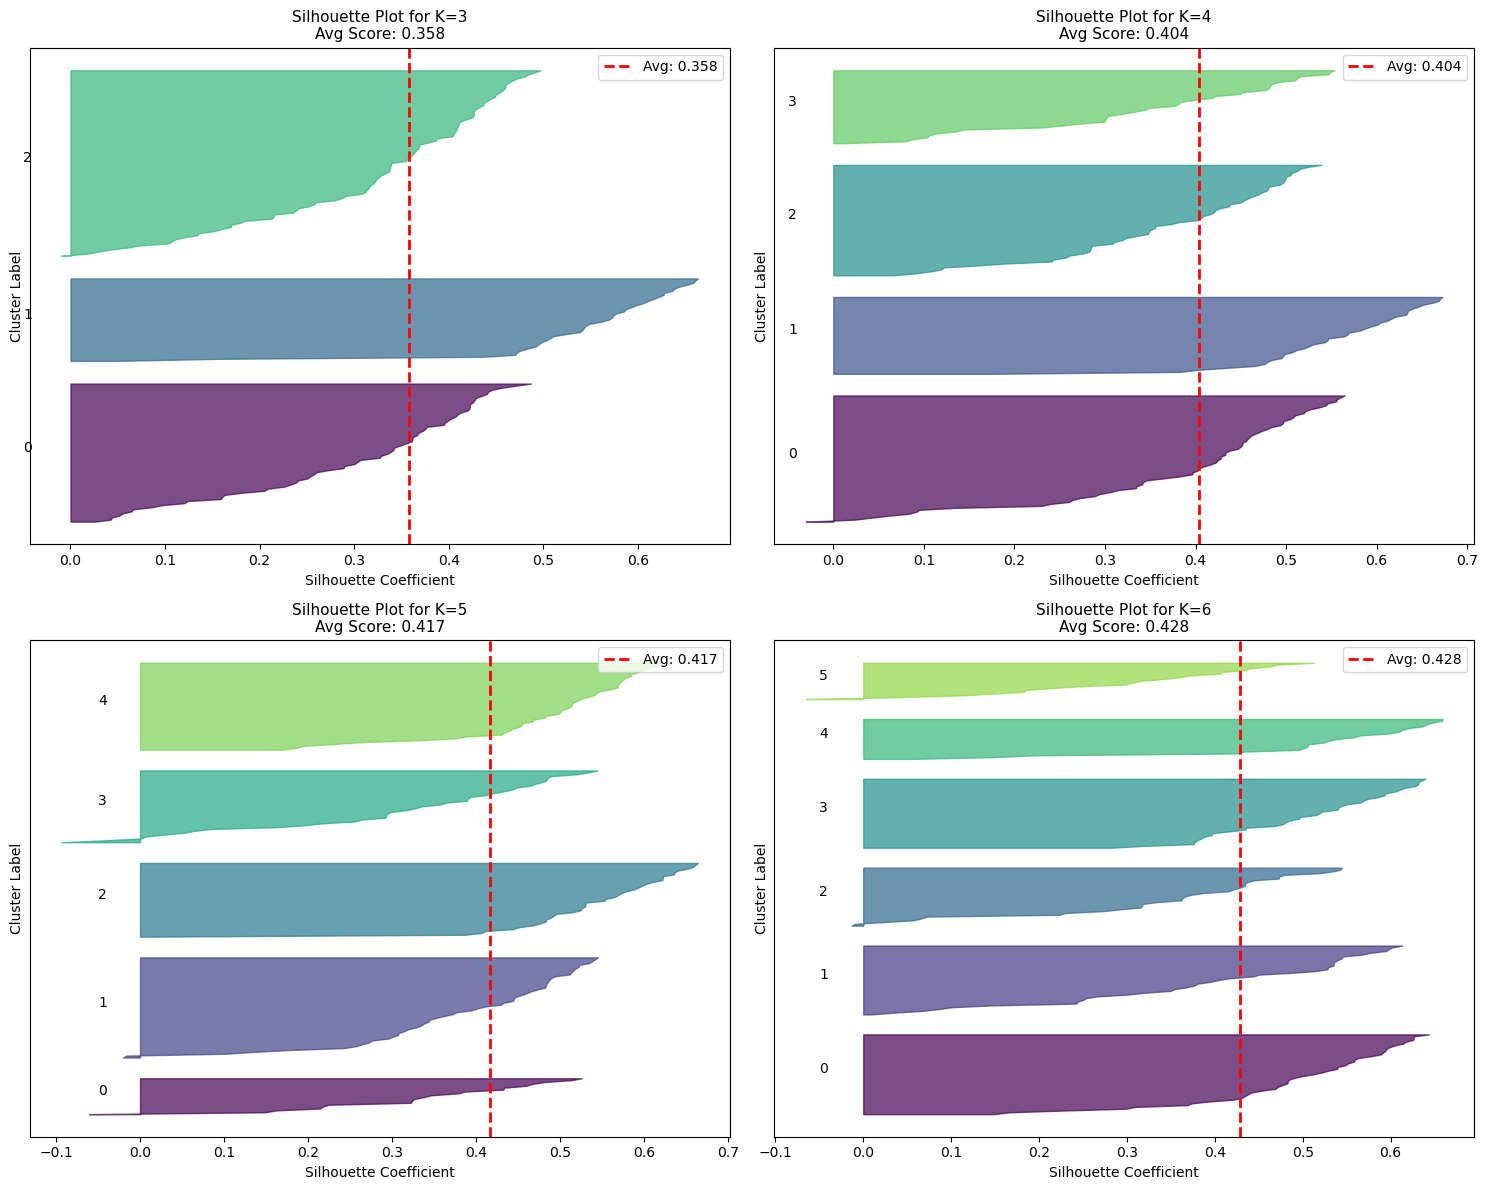


Silhouette Method Analysis:
The silhouette plot shows the silhouette coefficient for each sample,
grouped by cluster. A good clustering has:
  1. All clusters with above-average silhouette scores
  2. Clusters of similar thickness (balanced sizes)
  3. Few samples with negative scores (misclassified)


In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

candidate_ks = [3, 4, 5, 6]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, n_clusters in enumerate(candidate_ks):
    ax = axes[idx]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.viridis(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_title(f'Silhouette Plot for K={n_clusters}\nAvg Score: {silhouette_avg:.3f}', fontsize=11)
    ax.set_xlabel('Silhouette Coefficient', fontsize=10)
    ax.set_ylabel('Cluster Label', fontsize=10)
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2, label=f'Avg: {silhouette_avg:.3f}')
    ax.set_yticks([])
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

print("\nSilhouette Method Analysis:")
print("The silhouette plot shows the silhouette coefficient for each sample,")
print("grouped by cluster. A good clustering has:")
print("  1. All clusters with above-average silhouette scores")
print("  2. Clusters of similar thickness (balanced sizes)")
print("  3. Few samples with negative scores (misclassified)")

Silhouette method visualization

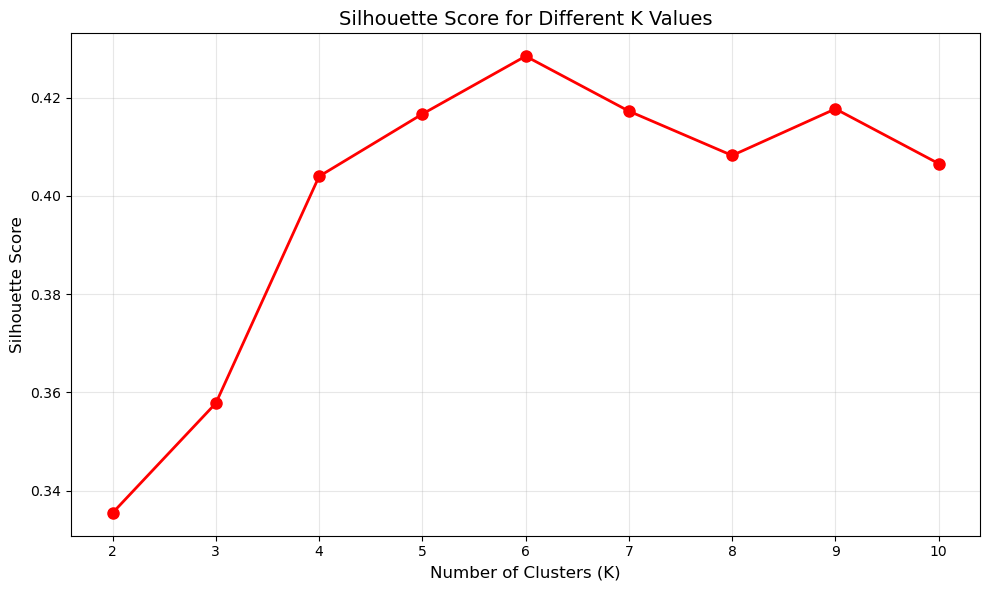

Silhouette scores for each K:
K=2: 0.3355
K=3: 0.3578
K=4: 0.4040
K=5: 0.4166
K=6: 0.4284
K=7: 0.4172
K=8: 0.4082
K=9: 0.4177
K=10: 0.4066

Optimal K based on Silhouette Score: 6


In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range_silhouette = range(2, 11)

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Different K Values', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range_silhouette)
plt.tight_layout()
plt.show()

print("Silhouette scores for each K:")
for k, score in zip(K_range_silhouette, silhouette_scores):
    print(f"K={k}: {score:.4f}")

optimal_k = K_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal K based on Silhouette Score: {optimal_k}")

### Part D: Modeling with K-Means

Apply K-Means clustering with optimal K

In [29]:
optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df['Cluster'] = cluster_labels

print(f"K-Means clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())
print(f"\nCluster centroids (scaled):")
print(pd.DataFrame(kmeans_final.cluster_centers_, columns=clustering_features))

K-Means clustering completed with K=5

Cluster distribution:
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64

Cluster centroids (scaled):
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.531074           -1.290508               -1.236467
1 -0.980679           -0.743060                0.467440
2 -0.428806            0.974847                1.216085
3  0.073331            0.974945               -1.197297
4  1.204841           -0.235773               -0.052368


Visualize clusters

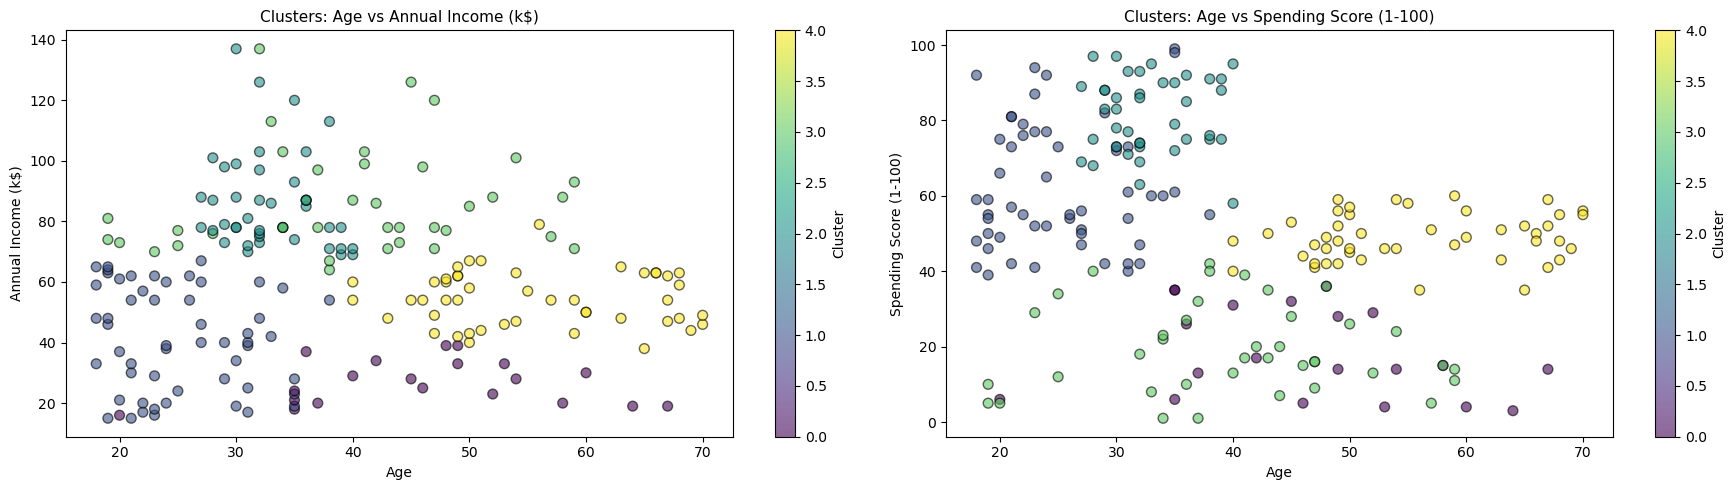

In [30]:
if len(clustering_features) >= 2:
    fig, axes = plt.subplots(1, min(3, len(clustering_features)-1), figsize=(18, 5))
    if min(3, len(clustering_features)-1) == 1:
        axes = [axes]
    
    combinations = [(0, 1), (0, 2) if len(clustering_features) > 2 else (0, 1), 
                   (1, 2) if len(clustering_features) > 2 else (0, 1)]
    
    for idx, (feat1_idx, feat2_idx) in enumerate(combinations[:len(axes)]):
        feat1 = clustering_features[feat1_idx]
        feat2 = clustering_features[feat2_idx]
        
        scatter = axes[idx].scatter(df[feat1], df[feat2], 
                                   c=df['Cluster'], cmap='viridis', 
                                   alpha=0.6, edgecolors='black', s=50)
        axes[idx].set_xlabel(feat1, fontsize=10)
        axes[idx].set_ylabel(feat2, fontsize=10)
        axes[idx].set_title(f'Clusters: {feat1} vs {feat2}', fontsize=11)
        plt.colorbar(scatter, ax=axes[idx], label='Cluster')
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough features for 2D visualization")

3D visualization if three or more features

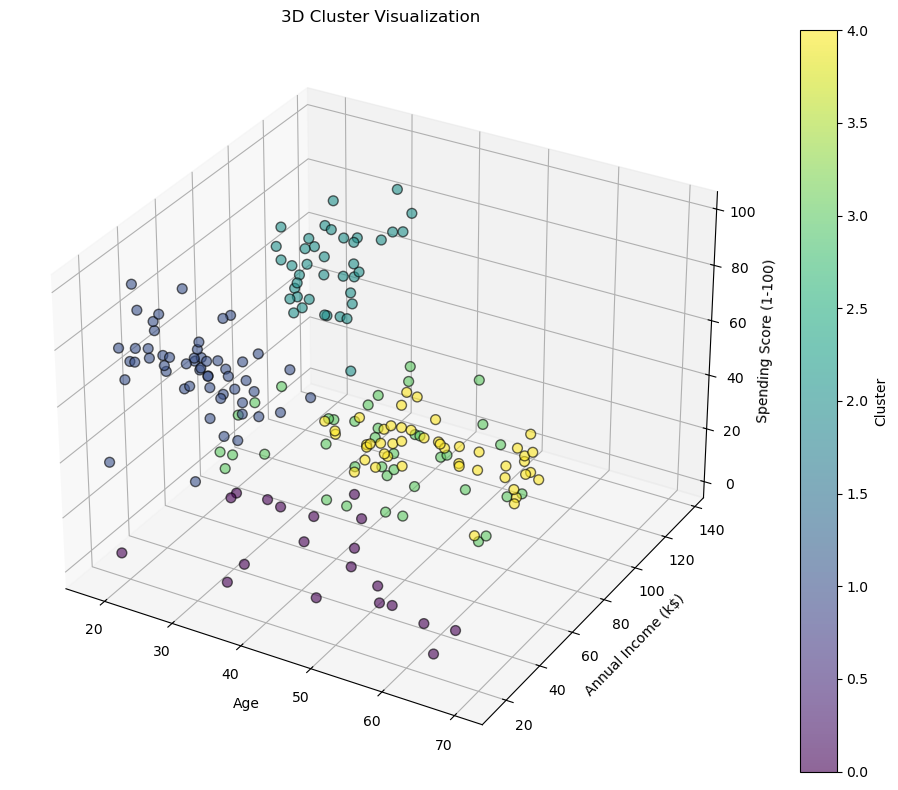

In [32]:
from mpl_toolkits.mplot3d import Axes3D

if len(clustering_features) >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(df[clustering_features[0]], 
                        df[clustering_features[1]], 
                        df[clustering_features[2]], 
                        c=df['Cluster'], cmap='viridis', 
                        alpha=0.6, edgecolors='black', s=50)
    
    ax.set_xlabel(clustering_features[0], fontsize=10)
    ax.set_ylabel(clustering_features[1], fontsize=10)
    ax.set_zlabel(clustering_features[2], fontsize=10)
    ax.set_title('3D Cluster Visualization', fontsize=12)
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough features for 3D visualization")

### Part E: Cluster Profiling & Insights

Statistical summary of each cluster

In [35]:
print("CLUSTER PROFILING - STATISTICAL SUMMARY")

for cluster_num in sorted(df['Cluster'].unique()):
    print(f"\nCLUSTER {cluster_num}")
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]
    print(f"Number of customers: {len(cluster_data)}")
    print(f"\nStatistics:")
    print(cluster_data.describe().round(2))

CLUSTER PROFILING - STATISTICAL SUMMARY

CLUSTER 0
Number of customers: 20

Statistics:
         Age  Annual Income (k$)  Spending Score (1-100)
count  20.00               20.00                   20.00
mean   46.25               26.75                   18.35
std    11.58                7.31                   11.94
min    20.00               16.00                    3.00
25%    36.75               20.00                    6.00
50%    47.00               26.50                   14.50
75%    53.25               33.00                   29.50
max    67.00               39.00                   36.00

CLUSTER 1
Number of customers: 54

Statistics:
         Age  Annual Income (k$)  Spending Score (1-100)
count  54.00               54.00                   54.00
mean   25.19               41.09                   62.24
std     5.51               16.82                   16.60
min    18.00               15.00                   39.00
25%    21.00               25.75                   50.00
50%    24

Cluster comparison visualization

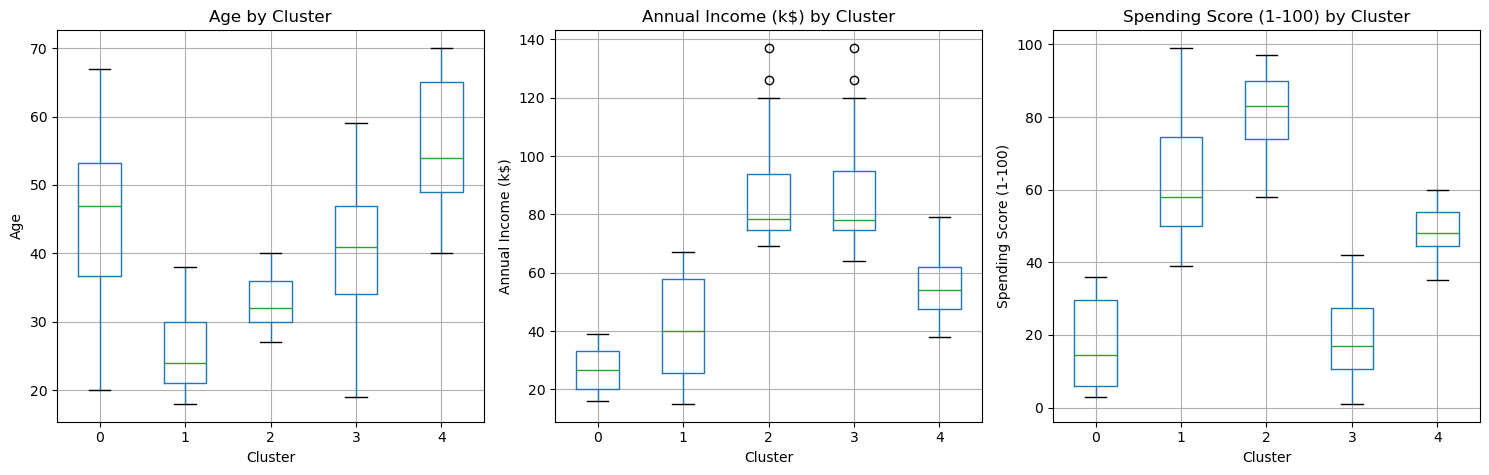

In [36]:
fig, axes = plt.subplots(1, len(clustering_features), figsize=(15, 5))
if len(clustering_features) == 1:
    axes = [axes]

for idx, feature in enumerate(clustering_features):
    df.boxplot(column=feature, by='Cluster', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Cluster')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(feature)

plt.suptitle('')  
plt.tight_layout()
plt.show()

Mean values comparison across clusters

In [38]:
summary_table = df.groupby('Cluster')[clustering_features].agg(['mean', 'std', 'min', 'max'])
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(df) * 100).round(2)

summary_means = df.groupby('Cluster')[clustering_features].mean().round(2)
summary_means['Count'] = cluster_counts
summary_means['Percentage'] = cluster_percentages

print("SUMMARY TABLE: CLUSTER CHARACTERISTICS")
print("\nMean Values and Size per Cluster:")
print(summary_means.to_string())

SUMMARY TABLE: CLUSTER CHARACTERISTICS

Mean Values and Size per Cluster:
           Age  Annual Income (k$)  Spending Score (1-100)  Count  Percentage
Cluster                                                                      
0        46.25               26.75                   18.35     20        10.0
1        25.19               41.09                   62.24     54        27.0
2        32.88               86.10                   81.53     40        20.0
3        39.87               86.10                   19.36     39        19.5
4        55.64               54.38                   48.85     47        23.5


In [40]:
print("DETAILED SUMMARY TABLE")

for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]
    print(f"\nCluster {cluster_num} (n={len(cluster_data)}, {len(cluster_data)/len(df)*100:.1f}%):")
    print("-" * 60)
    for feature in clustering_features:
        mean_val = cluster_data[feature].mean()
        std_val = cluster_data[feature].std()
        min_val = cluster_data[feature].min()
        max_val = cluster_data[feature].max()
        print(f"  {feature:20s}: μ={mean_val:7.2f}, σ={std_val:6.2f}, range=[{min_val:6.2f}, {max_val:6.2f}]")

DETAILED SUMMARY TABLE

Cluster 0 (n=20, 10.0%):
------------------------------------------------------------
  Age                 : μ=  46.25, σ= 11.58, range=[ 20.00,  67.00]
  Annual Income (k$)  : μ=  26.75, σ=  7.31, range=[ 16.00,  39.00]
  Spending Score (1-100): μ=  18.35, σ= 11.94, range=[  3.00,  36.00]

Cluster 1 (n=54, 27.0%):
------------------------------------------------------------
  Age                 : μ=  25.19, σ=  5.51, range=[ 18.00,  38.00]
  Annual Income (k$)  : μ=  41.09, σ= 16.82, range=[ 15.00,  67.00]
  Spending Score (1-100): μ=  62.24, σ= 16.60, range=[ 39.00,  99.00]

Cluster 2 (n=40, 20.0%):
------------------------------------------------------------
  Age                 : μ=  32.88, σ=  3.86, range=[ 27.00,  40.00]
  Annual Income (k$)  : μ=  86.10, σ= 16.34, range=[ 69.00, 137.00]
  Spending Score (1-100): μ=  81.53, σ= 10.00, range=[ 58.00,  97.00]

Cluster 3 (n=39, 19.5%):
------------------------------------------------------------
  Age      

In [42]:
print("SUMMARY TABLE:")
print(summary_means.to_markdown() if hasattr(summary_means, 'to_markdown') else summary_means.to_string())

SUMMARY TABLE:
|   Cluster |   Age |   Annual Income (k$) |   Spending Score (1-100) |   Count |   Percentage |
|----------:|------:|---------------------:|-------------------------:|--------:|-------------:|
|         0 | 46.25 |                26.75 |                    18.35 |      20 |         10   |
|         1 | 25.19 |                41.09 |                    62.24 |      54 |         27   |
|         2 | 32.88 |                86.1  |                    81.53 |      40 |         20   |
|         3 | 39.87 |                86.1  |                    19.36 |      39 |         19.5 |
|         4 | 55.64 |                54.38 |                    48.85 |      47 |         23.5 |


Summary table of means per cluster

Mean values for each cluster:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        46.25               26.75                   18.35
1        25.19               41.09                   62.24
2        32.88               86.10                   81.53
3        39.87               86.10                   19.36
4        55.64               54.38                   48.85


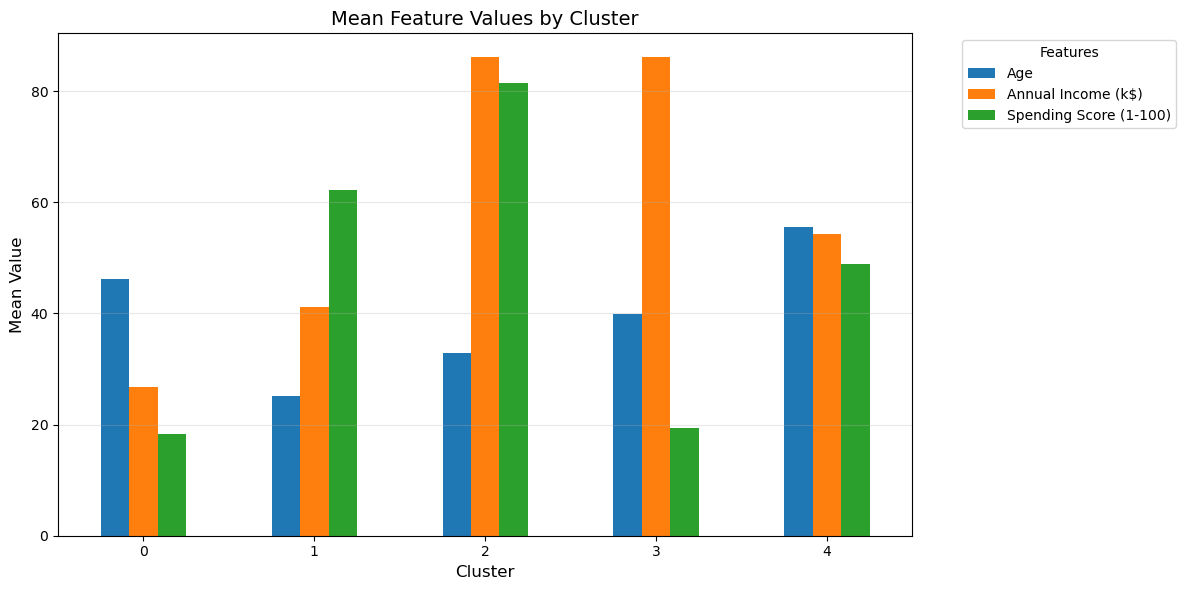

In [43]:
cluster_means = df.groupby('Cluster')[clustering_features].mean()
print("Mean values for each cluster:")
print(cluster_means.round(2))

cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Feature Values by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Cluster size distribution

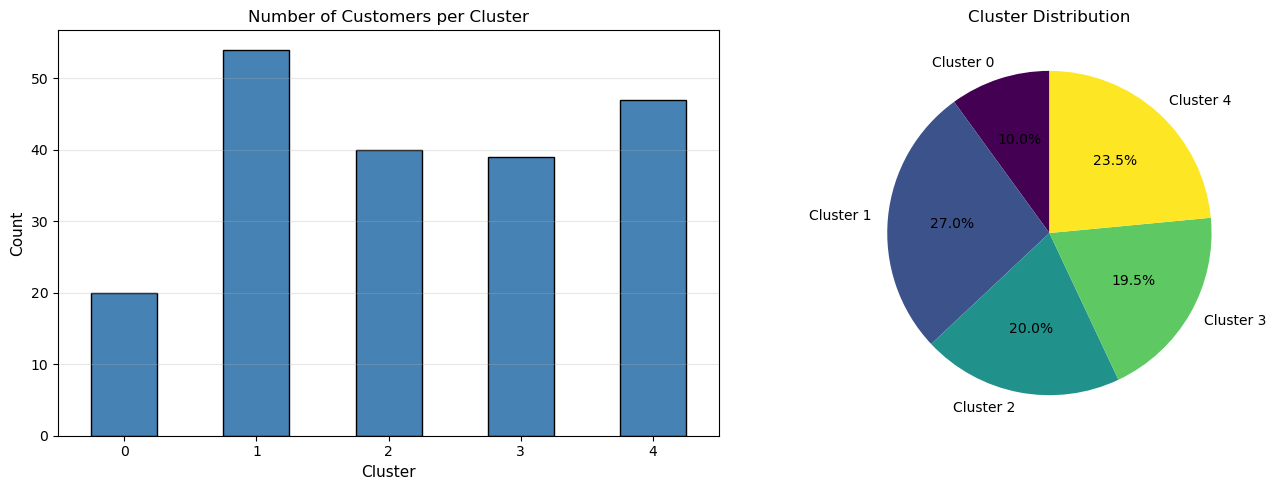


Cluster distribution:
Cluster 0: 20 customers (10.0%)
Cluster 1: 54 customers (27.0%)
Cluster 2: 40 customers (20.0%)
Cluster 3: 39 customers (19.5%)
Cluster 4: 47 customers (23.5%)


In [45]:
cluster_sizes = df['Cluster'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

cluster_sizes.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Number of Customers per Cluster', fontsize=12)
ax1.set_xlabel('Cluster', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

ax2.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index], 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes))))
ax2.set_title('Cluster Distribution', fontsize=12)

plt.tight_layout()
plt.show()

print("\nCluster distribution:")
for cluster, count in cluster_sizes.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

Business insights and recommendations

In [47]:
print("CLUSTER PERSONAS - DETAILED PROFILING")

for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]

    print(f"CLUSTER {cluster_num}: ", end="")
    
    means = cluster_data.mean()
    overall_means = df[clustering_features].mean()
    
    characteristics = []
    for feature in clustering_features:
        if means[feature] > overall_means[feature] * 1.2:
            characteristics.append(f"High {feature}")
        elif means[feature] < overall_means[feature] * 0.8:
            characteristics.append(f"Low {feature}")

    if len(characteristics) > 0:
        persona_name = " & ".join(characteristics[:2])
    else:
        persona_name = "Average Profile"
    
    print(f"{persona_name}")
    
    print(f"\nSIZE: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}% of total)")
    
    print(f"\nKEY CHARACTERISTICS:")
    for feature in clustering_features:
        mean_val = means[feature]
        overall_mean = overall_means[feature]
        diff_pct = ((mean_val - overall_mean) / overall_mean) * 100
        
        if diff_pct > 20:
            indicator = "▲▲ (Very High)"
        elif diff_pct > 10:
            indicator = "▲ (High)"
        elif diff_pct < -20:
            indicator = "▼▼ (Very Low)"
        elif diff_pct < -10:
            indicator = "▼ (Low)"
        else:
            indicator = "■ (Average)"
        
        print(f"  • {feature}: {mean_val:.2f} {indicator}")
        print(f"    (Overall avg: {overall_mean:.2f}, Difference: {diff_pct:+.1f}%)")
    
    print(f"\nPROFILE SUMMARY:")
    bullets = []
    for feature in clustering_features:
        mean_val = means[feature]
        overall_mean = overall_means[feature]
        diff_pct = ((mean_val - overall_mean) / overall_mean) * 100
        
        if abs(diff_pct) > 15:
            level = "significantly high" if diff_pct > 0 else "significantly low"
            bullets.append(f"  • Customers with {level} {feature} ({mean_val:.2f})")
    
    if len(bullets) > 0:
        for bullet in bullets:
            print(bullet)
    else:
        print(f"  • Customers with balanced characteristics across all features")
    
    print(f"\nVARIABILITY:")
    for feature in clustering_features:
        std_val = cluster_data[feature].std()
        cv = (std_val / means[feature]) * 100 if means[feature] != 0 else 0
        print(f"  • {feature}: σ={std_val:.2f}, CV={cv:.1f}% ({'Homogeneous' if cv < 30 else 'Diverse'})")

CLUSTER PERSONAS - DETAILED PROFILING
CLUSTER 0: Low Annual Income (k$) & Low Spending Score (1-100)

SIZE: 20 customers (10.0% of total)

KEY CHARACTERISTICS:
  • Age: 46.25 ▲ (High)
    (Overall avg: 38.85, Difference: +19.0%)
  • Annual Income (k$): 26.75 ▼▼ (Very Low)
    (Overall avg: 60.56, Difference: -55.8%)
  • Spending Score (1-100): 18.35 ▼▼ (Very Low)
    (Overall avg: 50.20, Difference: -63.4%)

PROFILE SUMMARY:
  • Customers with significantly high Age (46.25)
  • Customers with significantly low Annual Income (k$) (26.75)
  • Customers with significantly low Spending Score (1-100) (18.35)

VARIABILITY:
  • Age: σ=11.58, CV=25.0% (Homogeneous)
  • Annual Income (k$): σ=7.31, CV=27.3% (Homogeneous)
  • Spending Score (1-100): σ=11.94, CV=65.0% (Diverse)
CLUSTER 1: Low Age & Low Annual Income (k$)

SIZE: 54 customers (27.0% of total)

KEY CHARACTERISTICS:
  • Age: 25.19 ▼▼ (Very Low)
    (Overall avg: 38.85, Difference: -35.2%)
  • Annual Income (k$): 41.09 ▼▼ (Very Low)
  

Cluster personas and profiles

In [49]:
print("CLUSTER INSIGHTS AND BUSINESS RECOMMENDATIONS")

for cluster_num in sorted(df['Cluster'].unique()):
    print(f"CLUSTER {cluster_num} PROFILE")
    
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]
    
    print(f"Size: {len(cluster_data)} customers ({(len(cluster_data)/len(df)*100):.1f}% of total)")
    print(f"\nKey Characteristics:")
    
    for feature in clustering_features:
        mean_val = cluster_data[feature].mean()
        overall_mean = df[feature].mean()
        diff = ((mean_val - overall_mean) / overall_mean) * 100
        
        if abs(diff) > 10: 
            direction = "higher" if diff > 0 else "lower"
            print(f"  - {feature}: {mean_val:.2f} ({abs(diff):.1f}% {direction} than average)")
        else:
            print(f"  - {feature}: {mean_val:.2f} (near average)")

CLUSTER INSIGHTS AND BUSINESS RECOMMENDATIONS
CLUSTER 0 PROFILE
Size: 20 customers (10.0% of total)

Key Characteristics:
  - Age: 46.25 (19.0% higher than average)
  - Annual Income (k$): 26.75 (55.8% lower than average)
  - Spending Score (1-100): 18.35 (63.4% lower than average)
CLUSTER 1 PROFILE
Size: 54 customers (27.0% of total)

Key Characteristics:
  - Age: 25.19 (35.2% lower than average)
  - Annual Income (k$): 41.09 (32.1% lower than average)
  - Spending Score (1-100): 62.24 (24.0% higher than average)
CLUSTER 2 PROFILE
Size: 40 customers (20.0% of total)

Key Characteristics:
  - Age: 32.88 (15.4% lower than average)
  - Annual Income (k$): 86.10 (42.2% higher than average)
  - Spending Score (1-100): 81.53 (62.4% higher than average)
CLUSTER 3 PROFILE
Size: 39 customers (19.5% of total)

Key Characteristics:
  - Age: 39.87 (near average)
  - Annual Income (k$): 86.10 (42.2% higher than average)
  - Spending Score (1-100): 19.36 (61.4% lower than average)
CLUSTER 4 PROFILE

In [50]:
print("SUMMARY AND RECOMMENDATIONS")
print("""
Based on the cluster analysis:

1. Each cluster represents a distinct customer segment with unique characteristics
2. Marketing strategies should be tailored to each cluster's profile
3. Resource allocation can be optimized based on cluster sizes and characteristics
4. Product offerings can be customized for different segments
5. Customer retention strategies should address specific cluster needs

Next Steps:
- Validate clusters with business stakeholders
- Develop targeted marketing campaigns for each segment
- Monitor cluster stability over time
- Consider A/B testing different strategies within clusters
""")

SUMMARY AND RECOMMENDATIONS

Based on the cluster analysis:

1. Each cluster represents a distinct customer segment with unique characteristics
2. Marketing strategies should be tailored to each cluster's profile
3. Resource allocation can be optimized based on cluster sizes and characteristics
4. Product offerings can be customized for different segments
5. Customer retention strategies should address specific cluster needs

Next Steps:
- Validate clusters with business stakeholders
- Develop targeted marketing campaigns for each segment
- Monitor cluster stability over time
- Consider A/B testing different strategies within clusters



Model evaluation metrics

CUSTOMER TARGETING MATRIX

  Cluster  Size Percentage Segment Type Priority       Focus Area
       0    20      10.0%       Budget   Medium     Value Offers
       1    54      27.0%       Budget   Medium     Value Offers
       2    40      20.0%      Premium     High Premium Products
       3    39      19.5%   Mainstream   Medium      Broad Range
       4    47      23.5%      Premium     High Premium Products


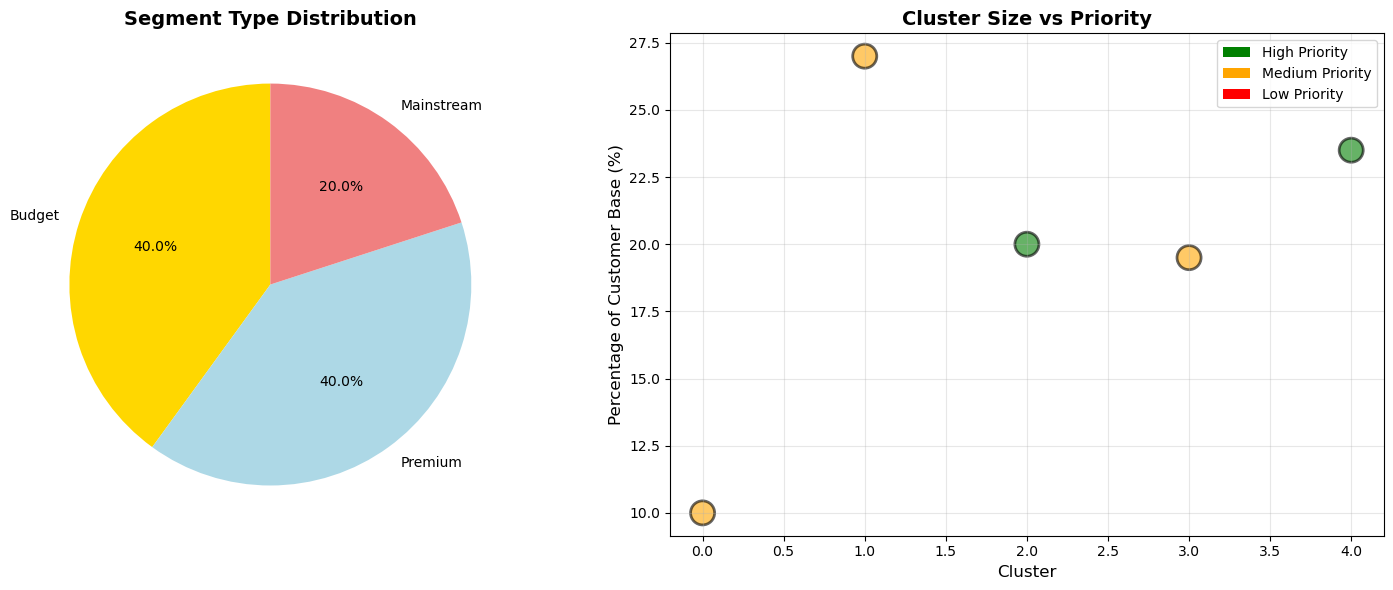

TARGETING PRIORITY RECOMMENDATIONS:

Cluster 0 - Budget Segment:
  Priority: Medium
  Size: 20 customers (10.0%)
  Recommended Focus: Value Offers
Action: Standard marketing with customized messaging

Cluster 1 - Budget Segment:
  Priority: Medium
  Size: 54 customers (27.0%)
  Recommended Focus: Value Offers
Action: Standard marketing with customized messaging

Cluster 2 - Premium Segment:
  Priority: High
  Size: 40 customers (20.0%)
  Recommended Focus: Premium Products
Action: Allocate premium marketing budget and resources

Cluster 3 - Mainstream Segment:
  Priority: Medium
  Size: 39 customers (19.5%)
  Recommended Focus: Broad Range
Action: Standard marketing with customized messaging

Cluster 4 - Premium Segment:
  Priority: High
  Size: 47 customers (23.5%)
  Recommended Focus: Premium Products
Action: Allocate premium marketing budget and resources


In [55]:
import pandas as pd

print("CUSTOMER TARGETING MATRIX")

targeting_matrix = []

for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]
    means = cluster_data.mean()
    overall_means = df[clustering_features].mean()
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df)) * 100

    high_count = sum([(means[f] > overall_means[f] * 1.15) for f in clustering_features])
    low_count = sum([(means[f] < overall_means[f] * 0.85) for f in clustering_features])
    
    if high_count > low_count and high_count > 0:
        segment_type = "Premium"
        priority = "High"
    elif low_count > high_count and low_count > 0:
        segment_type = "Budget"
        priority = "Medium"
    else:
        segment_type = "Mainstream"
        priority = "High" if cluster_pct > 20 else "Medium"
    
    targeting_matrix.append({
        'Cluster': cluster_num,
        'Size': cluster_size,
        'Percentage': f"{cluster_pct:.1f}%",
        'Segment Type': segment_type,
        'Priority': priority,
        'Focus Area': 'Premium Products' if segment_type == "Premium" else 
                     'Value Offers' if segment_type == "Budget" else 'Broad Range'
    })

targeting_df = pd.DataFrame(targeting_matrix)
print("\n", targeting_df.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

segment_counts = targeting_df['Segment Type'].value_counts()
ax1.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['gold', 'lightblue', 'lightcoral'])
ax1.set_title('Segment Type Distribution', fontsize=14, fontweight='bold')

colors_map = {'High': 'green', 'Medium': 'orange', 'Low': 'red'}
colors = [colors_map[p] for p in targeting_df['Priority']]
ax2.scatter(targeting_df['Cluster'], 
           [float(p.rstrip('%')) for p in targeting_df['Percentage']], 
           s=300, c=colors, alpha=0.6, edgecolors='black', linewidth=2)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Percentage of Customer Base (%)', fontsize=12)
ax2.set_title('Cluster Size vs Priority', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='High Priority'),
                  Patch(facecolor='orange', label='Medium Priority'),
                  Patch(facecolor='red', label='Low Priority')]
ax2.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

print("TARGETING PRIORITY RECOMMENDATIONS:")

for _, row in targeting_df.iterrows():
    print(f"\nCluster {row['Cluster']} - {row['Segment Type']} Segment:")
    print(f"  Priority: {row['Priority']}")
    print(f"  Size: {row['Size']} customers ({row['Percentage']})")
    print(f"  Recommended Focus: {row['Focus Area']}")
    
    if row['Priority'] == 'High':
        print(f"Action: Allocate premium marketing budget and resources")
    elif row['Priority'] == 'Medium':
        print(f"Action: Standard marketing with customized messaging")
    else:
        print(f"Action: Monitor and optimize as needed")

Customer targeting matrix

In [56]:
print("MANAGERIAL IMPLICATIONS & STRATEGIC RECOMMENDATIONS")
print("\nThis section provides actionable insights for business strategy,")
print("marketing campaigns, and customer retention initiatives.")

for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_num][clustering_features]
    means = cluster_data.mean()
    overall_means = df[clustering_features].mean()
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df)) * 100

    print(f"CLUSTER {cluster_num} - STRATEGIC IMPLICATIONS")
    print(f"Segment Size: {cluster_size} customers ({cluster_pct:.1f}% of customer base)")
   
    print(f"TARGETING STRATEGY:")
    
    high_features = []
    low_features = []
    
    for feature in clustering_features:
        diff_pct = ((means[feature] - overall_means[feature]) / overall_means[feature]) * 100
        if diff_pct > 15:
            high_features.append(feature)
        elif diff_pct < -15:
            low_features.append(feature)
    
    if len(high_features) > 0 and len(low_features) > 0:
        print(f"  • Mixed-value segment requiring balanced approach")
        print(f"  • Focus on leveraging high {', '.join(high_features)}")
        print(f"  • Address concerns related to low {', '.join(low_features)}")
    elif len(high_features) > 0:
        print(f"  • Premium/High-value segment")
        print(f"  • Strong in: {', '.join(high_features)}")
        print(f"  • Excellent opportunity for upselling and premium offerings")
    elif len(low_features) > 0:
        print(f"  • Budget-conscious/Value-seeking segment")
        print(f"  • Characterized by: Low {', '.join(low_features)}")
        print(f"  • Focus on value propositions and entry-level products")
    else:
        print(f"  • Mainstream/Average segment")
        print(f"  • Balanced characteristics across all dimensions")
        print(f"  • Standard marketing approach with broad appeal")

    print(f"MARKETING CAMPAIGN IDEAS:")

    if cluster_pct > 30:
        print(f"  • Large segment ({cluster_pct:.0f}%) - allocate significant marketing budget")
        print(f"  • Mass marketing campaigns with broad reach")
    elif cluster_pct < 15:
        print(f"  • Niche segment ({cluster_pct:.0f}%) - targeted, personalized campaigns")
        print(f"  • Focus on quality over quantity")
    else:
        print(f"  • Medium-sized segment ({cluster_pct:.0f}%) - balanced approach")
        print(f"  • Selective marketing with clear segmentation")
    
    campaign_type = []
    for feature in clustering_features:
        diff_pct = ((means[feature] - overall_means[feature]) / overall_means[feature]) * 100
        if diff_pct > 20:
            campaign_type.append(f"Premium {feature}-focused campaigns")
        elif diff_pct < -20:
            campaign_type.append(f"Value-oriented {feature} promotions")
    
    if campaign_type:
        for campaign in campaign_type:
            print(f"  • {campaign}")
    else:
        print(f"  • Standard promotional campaigns")
        print(f"  • Seasonal offers and loyalty programs")
    
    print(f"RETENTION STRATEGIES:")
    
    print(f"  • Design loyalty programs tailored to this segment's profile")
    print(f"  • Monitor satisfaction metrics specific to their characteristics")
    
    if cluster_pct > 25:
        print(f"  • HIGH PRIORITY: Major revenue contributor - implement premium retention")
        print(f"  • Dedicated customer success team")
        print(f"  • Regular engagement and feedback loops")
    elif cluster_pct < 15:
        print(f"  • Specialized retention approach for niche segment")
        print(f"  • Personalized communication and offers")
    else:
        print(f"  • Standard retention programs with segment customization")
    
    print(f"\nREVENUE OPTIMIZATION:")
    
    if high_features:
        print(f"  • Upselling opportunities in {', '.join(high_features)}")
        print(f"  • Premium product lines and services")
        print(f"  • Higher price tolerance - test premium pricing")
    else:
        print(f"  • Volume-based strategies")
        print(f"  • Cross-selling complementary products")
        print(f"  • Competitive pricing to maintain loyalty")
    
    print(f"\nRISK FACTORS:")
    
    if low_features:
        print(f"  • Potential churn risk due to low {', '.join(low_features)}")
        print(f"  • Monitor engagement metrics closely")
        print(f"  • Implement proactive retention measures")
    else:
        print(f"  • Relatively stable segment")
        print(f"  • Standard monitoring and engagement")
    
    print(f"\nACTION ITEMS:")
    print(f"  1. Create segment-specific product bundles")
    print(f"  2. Develop targeted communication templates")
    print(f"  3. Set up performance KPIs for this segment")
    print(f"  4. Schedule quarterly segment performance reviews")
    print(f"  5. A/B test different approaches within this cluster")

MANAGERIAL IMPLICATIONS & STRATEGIC RECOMMENDATIONS

This section provides actionable insights for business strategy,
marketing campaigns, and customer retention initiatives.
CLUSTER 0 - STRATEGIC IMPLICATIONS
Segment Size: 20 customers (10.0% of customer base)
TARGETING STRATEGY:
  • Mixed-value segment requiring balanced approach
  • Focus on leveraging high Age
  • Address concerns related to low Annual Income (k$), Spending Score (1-100)
MARKETING CAMPAIGN IDEAS:
  • Niche segment (10%) - targeted, personalized campaigns
  • Focus on quality over quantity
  • Value-oriented Annual Income (k$) promotions
  • Value-oriented Spending Score (1-100) promotions
RETENTION STRATEGIES:
  • Design loyalty programs tailored to this segment's profile
  • Monitor satisfaction metrics specific to their characteristics
  • Specialized retention approach for niche segment
  • Personalized communication and offers

REVENUE OPTIMIZATION:
  • Upselling opportunities in Age
  • Premium product lines a

In [57]:
print("OVERALL STRATEGIC SUMMARY")
print("""
KEY TAKEAWAYS FOR MANAGEMENT:

1. SEGMENTATION APPROACH:
   • Treat each cluster as a distinct customer segment
   • Avoid one-size-fits-all strategies
   • Customize offerings based on cluster characteristics

2. RESOURCE ALLOCATION:
   • Prioritize larger clusters for mass marketing
   • Allocate specialized resources for high-value segments
   • Balance investment across all segments

3. PRODUCT DEVELOPMENT:
   • Design products/services tailored to cluster needs
   • Consider cluster feedback in product roadmap
   • Test new features with representative clusters

4. PERFORMANCE METRICS:
   • Track KPIs separately for each cluster
   • Monitor cluster migration over time
   • Measure campaign effectiveness by segment

5. COMPETITIVE POSITIONING:
   • Identify competitors targeting similar segments
   • Develop unique value propositions per cluster
   • Protect high-value segments from competition

6. IMPLEMENTATION ROADMAP:
   • Phase 1 (Month 1-2): Launch segment-specific campaigns
   • Phase 2 (Month 3-4): Measure initial results and optimize
   • Phase 3 (Month 5-6): Scale successful strategies
   • Phase 4 (Ongoing): Continuous monitoring and refinement
""")

OVERALL STRATEGIC SUMMARY

KEY TAKEAWAYS FOR MANAGEMENT:

1. SEGMENTATION APPROACH:
   • Treat each cluster as a distinct customer segment
   • Avoid one-size-fits-all strategies
   • Customize offerings based on cluster characteristics

2. RESOURCE ALLOCATION:
   • Prioritize larger clusters for mass marketing
   • Allocate specialized resources for high-value segments
   • Balance investment across all segments

3. PRODUCT DEVELOPMENT:
   • Design products/services tailored to cluster needs
   • Consider cluster feedback in product roadmap
   • Test new features with representative clusters

4. PERFORMANCE METRICS:
   • Track KPIs separately for each cluster
   • Monitor cluster migration over time
   • Measure campaign effectiveness by segment

5. COMPETITIVE POSITIONING:
   • Identify competitors targeting similar segments
   • Develop unique value propositions per cluster
   • Protect high-value segments from competition

6. IMPLEMENTATION ROADMAP:
   • Phase 1 (Month 1-2): Launch

Strategic targeting and marketing strategies

### Managerial Implications and Recommendations

In [58]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)

print("MODEL EVALUATION METRICS")
print(f"\nSilhouette Score: {silhouette:.4f}")
print("  (Range: -1 to 1, higher is better, >0.5 is good)")
print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print("  (Lower is better, indicates better separation between clusters)")
print(f"\nCalinski-Harabasz Score: {calinski_harabasz:.2f}")
print("  (Higher is better, indicates better defined clusters)")
print(f"\nInertia (Within-Cluster Sum of Squares): {kmeans_final.inertia_:.2f}")
print("  (Lower is better, but should be balanced with number of clusters)")

print("\nOverall clustering quality: ", end="")
if silhouette > 0.5 and davies_bouldin < 1.0:
    print("EXCELLENT")
elif silhouette > 0.3 and davies_bouldin < 1.5:
    print("GOOD")
else:
    print("ACCEPTABLE (Consider refining)")

MODEL EVALUATION METRICS

Silhouette Score: 0.4166
  (Range: -1 to 1, higher is better, >0.5 is good)

Davies-Bouldin Index: 0.8746
  (Lower is better, indicates better separation between clusters)

Calinski-Harabasz Score: 125.10
  (Higher is better, indicates better defined clusters)

Inertia (Within-Cluster Sum of Squares): 168.25
  (Lower is better, but should be balanced with number of clusters)

Overall clustering quality: GOOD
